# Model for Agra

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Mental_Health_Agra = pd.read_csv('Datasheet/MH.Agra.Clean.2.csv')

In [3]:
Mental_Health_Agra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4684 entries, 0 to 4683
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     4684 non-null   int64  
 1   Gender                                 4684 non-null   int64  
 2   Age                                    4684 non-null   float64
 3   City                                   4684 non-null   object 
 4   Sleep Duration                         4684 non-null   float64
 5   Dietary Habits                         4684 non-null   float64
 6   Have you ever had suicidal thoughts ?  4684 non-null   int64  
 7   Work/Study Hours                       4684 non-null   float64
 8   Financial Stress                       4684 non-null   float64
 9   Family History of Mental Illness       4684 non-null   int64  
 10  Work                                   4684 non-null   int64  
 11  Sati

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
import sklearn
from sklearn.tree import DecisionTreeClassifier # predict proba
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.impute import SimpleImputer
import xgboost as xgb
from sklearn.ensemble import VotingClassifier

In [5]:
from xgboost import XGBClassifier

### Model XboostClassifier

In [6]:
model_Agra = XGBClassifier()

In [7]:
model_Agra.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [8]:
params = {'base_score': [0.5],
         'booster': ['gbtree'],
         'colsample_bylevel': [1],
         'colsample_bynode': [0.6],
         'colsample_bytree': [0.7],
         'gamma': [0.01],
         'learning_rate': [0.06,0.05,0.04,0.02],
         'max_depth':[2,3,4],
         'min_child_weight': [1],
         'n_estimators': [400,500,600],
         'n_jobs': [-1],
         'reg_alpha': [0.1],
         'reg_lambda': [0.01,0.1],
         'scale_pos_weight': [1],
         'subsample': [0.9]}

In [9]:
scoring = ["roc_auc"]
grid_solver = GridSearchCV(estimator = model_Agra,
                   param_grid = params,
                   scoring = scoring,
                   cv = 5,
                   n_jobs=-1,
                   refit="roc_auc",
                   verbose = 2)

In [10]:
X = Mental_Health_Agra.drop(columns = ["City","Depression"])
y = Mental_Health_Agra["Depression"]
Agra_results = grid_solver.fit(X,y)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [11]:
Agra_results.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=0.6, colsample_bytree=0.7,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.01,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=600, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [12]:
y_pred_Agra = Agra_results.predict(X)
y_pred_Agra

array([0, 0, 1, ..., 0, 0, 0], shape=(4684,))

In [ ]:
# define a threshold
# threshold = 0.5
# y_pre_bin = np.where(y_pre > threshold, 1, 0)

In [13]:
from sklearn.metrics import confusion_matrix

def confusion(ytest,y_pred):
    names=["No depresive","Depressive"]
    cm=confusion_matrix(ytest,y_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

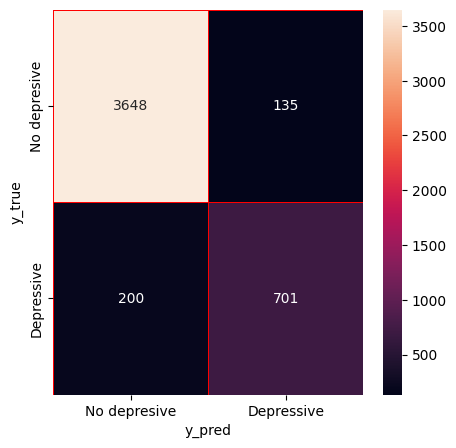

In [14]:
confusion(y,y_pred_Agra)

In [15]:
from sklearn.metrics import accuracy_score
Xboost_City = accuracy_score(y,y_pred_Agra)
Xboost_City 

0.9284799316823228

### Model Random Forest

In [ ]:
# X = Mental_Health_Agra.drop(columns = ["City","Depression"])
# y = Mental_Health_Agra["Depression"]

In [16]:
# check the param of the model 'Random Forest'
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [17]:
# modification of the param 'Random Forest'
paramsF = {'ccp_alpha': [0.0 ,0.01],
 'max_depth': [3, 4, 5, 6], # branches of the trees
 'max_features': [0.1, 0.3, 0.6], # features considered
 'max_samples': [0.4, 0.6,0.8], # test-train population
 'n_estimators': [1000], # number trees
 'n_jobs': [-1]} # multicore

In [18]:
n_cv = 5
model_city_F = RandomForestRegressor()

scoring = ['neg_mean_squared_error', 'explained_variance', 'r2']

# I made the evaluation with GridSeacrh
grid_city_Forest = GridSearchCV(estimator = model_city_F, # model to train
                           param_grid = paramsF, # param_grid
                           scoring = scoring,
                           cv = n_cv, #number of independent 
                           refit = 'neg_mean_squared_error',
                           verbose = 2) 

In [19]:
# searchin for the in the forest.
model_City_solver = grid_city_Forest.fit(X, y)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END ccp_alpha=0.0, max_depth=3, max_features=0.1, max_samples=0.4, n_estimators=1000, n_jobs=-1; total time=   0.5s
[CV] END ccp_alpha=0.0, max_depth=3, max_features=0.1, max_samples=0.4, n_estimators=1000, n_jobs=-1; total time=   0.5s
[CV] END ccp_alpha=0.0, max_depth=3, max_features=0.1, max_samples=0.4, n_estimators=1000, n_jobs=-1; total time=   0.5s
[CV] END ccp_alpha=0.0, max_depth=3, max_features=0.1, max_samples=0.4, n_estimators=1000, n_jobs=-1; total time=   0.5s
[CV] END ccp_alpha=0.0, max_depth=3, max_features=0.1, max_samples=0.4, n_estimators=1000, n_jobs=-1; total time=   0.5s
[CV] END ccp_alpha=0.0, max_depth=3, max_features=0.1, max_samples=0.6, n_estimators=1000, n_jobs=-1; total time=   0.5s
[CV] END ccp_alpha=0.0, max_depth=3, max_features=0.1, max_samples=0.6, n_estimators=1000, n_jobs=-1; total time=   0.5s
[CV] END ccp_alpha=0.0, max_depth=3, max_features=0.1, max_samples=0.6, n_estimators=1000, 

In [20]:
Forest_City = model_City_solver.best_estimator_
Forest_City

RandomForestRegressor(max_depth=6, max_features=0.6, max_samples=0.6,
                      n_estimators=1000, n_jobs=-1)

In [21]:
y_pred_F = Forest_City.predict(X)
y_pred_F

array([0.0477083 , 0.0428443 , 0.80122787, ..., 0.10963724, 0.01691248,
       0.11785677], shape=(4684,))

In [44]:
threshold = 0.5
y_pred_F_bin = np.where(y_pred_F > threshold, 1, 0)
y_pred_F_bin

array([0, 0, 1, ..., 0, 0, 0], shape=(4684,))

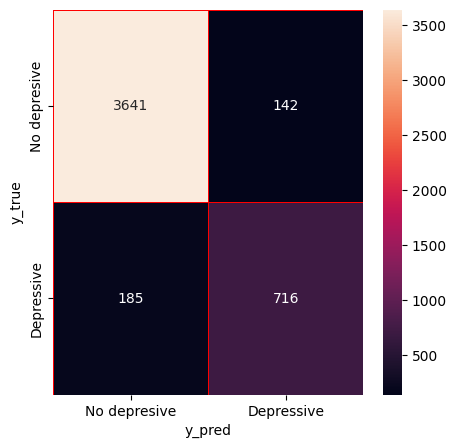

In [45]:
confusion(y,y_pred_F_bin)

In [46]:
Forest_City = accuracy_score(y,y_pred_F_bin)
Forest_City

0.9301878736122972

In [47]:
Xboost_City - Forest_City

-0.0017079419299743659

### In Agra, it seems that the best model is Random Forest

## Test Agra

In [26]:
MH_Test_Agra = pd.read_csv('Datasheet/MH.Agra.Test.Clean.2.csv')
MH_Test_Agra.head(3)

,id,Gender,Age,City,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Work,Satisfaction,Pressure
0,140788,0,56.0,Agra,4.5,1.0,0,11.0,4.0,0,1,3.0,5.0
1,140806,0,55.0,Agra,7.5,1.0,0,0.0,2.0,0,1,2.0,2.0
2,140830,1,50.0,Agra,8.5,1.0,0,7.0,4.0,0,1,2.0,3.0


In [29]:
# Choose the model with the best accuracy score.
# Agra_model = Agra_results.best_estimator_
Agra_model = model_City_solver.best_estimator_

In [30]:
Prediction_Agra = Agra_model.predict(MH_Test_Agra.drop(columns = ["City"]))

In [31]:
Prediction_Agra

array([0.02798922, 0.01213887, 0.00722238, ..., 0.10349271, 0.01170421,
       0.8835308 ], shape=(3189,))

In [32]:
# neccesary if the model is Random Forest
threshold = 0.5
Prediction_Agra_bin = np.where(Prediction_Agra > threshold, 1, 0)
Prediction_Agra_bin

array([0, 0, 0, ..., 0, 0, 1], shape=(3189,))

In [36]:
MH_Test_Agra["Depression"]=Prediction_Agra_bin

In [38]:
Submission_Agra = MH_Test_Agra[['id','Depression']]
Submission_Agra

,id,Depression
0,140788,0
1,140806,0
2,140830,0
3,140865,1
4,140880,0
...,...,...
3184,234421,0
3185,234433,0
3186,234439,0
3187,234470,0


In [ ]:
# df_results = result.sort_values(by='id', ascending=True).reset_index(drop=True)

In [39]:
Submission_Agra.to_csv('Datasheet/Submission.2.5.Agra.csv', index=False)